## Comparing GC between conditions and directions of info flow on simulated VAR
In this Notebook we plot the results of comparing GC between conditions and
directions of information flow from VAR simulated time series.

When comparing GC between distinct conditions and directions, VAR time series are simulated from different random stable VAR models so we should expect to some difference in GC between conditions or directions of information flow. 

## Import libraries and set up plottings parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from src.preprocessing_lib import EcogReader, parcellation_to_indices
from scipy.io import loadmat
from pathlib import Path



In [2]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 28  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

## Plotting functions

In [33]:
# Plotting functions to compare GC between conditions
def plot_compare_condition_GC(F, cmap='BrBg_r',
                       vmin = -5, vmax=5, Fmax=0.3):
    """
    We plot Z score from comparing permutation group F in condition 1 with
    condition 2.
    """
    # xticks
    # Get statistics from matlab analysis
    z = F['z'][0][0]
    zcrit = F['zcrit'][0][0]
    sig = F['sig'][0][0]
    Fd = F['Fd'][0][0]
    np.fill_diagonal(sig, 0)
    annotations = np.where(sig == 1, "*", "")
    # Plot Z score as a heatmap with statistical significant entries.
    sns.set()
    fig, ax = plt.subplots(1,2)
    sns.heatmap(z, annot=annotations, fmt="", vmin=vmin, vmax=vmax, cmap=cmap, ax=ax[0])
    ax[0].set_xlabel('From')
    ax[0].set_ylabel('to')
    sns.heatmap(Fd, annot=annotations, fmt="", vmin=-Fmax, vmax=Fmax, cmap=cmap, ax=ax[1])
    ax[1].set_xlabel('From')
    ax[1].set_ylabel('to')
    plt.show()
    # Plot statistical significant entries 
    print(f"\n Critical Z score is {zcrit}\n")




In [ ]:
def plot_top_down_z(F,cmap ='PuOr_r', vmin = -3, vmax=3, Fmax=0.5):
    zcrit = 1.96
    z = F['z'][0][0]
    Fd = F['Fd'][0][0]
    vmax = np.amax(np.abs(z))
    vmin = - vmax
    sig = np.where(np.abs(z) > zcrit, 1, 0)
    annotations = np.where(sig == 1, "*", "")
    # Plot Z score as a heatmap
    sns.set()
    fig, ax = plt.subplots(1,2)
    sns.heatmap(z, annot=annotations, fmt="", vmin=vmin, vmax=vmax, cmap=cmap, ax=ax[0])
    ax[0].set_xlabel('From')
    ax[0].set_ylabel('to')
    sns.heatmap(Fd, annot=annotations, fmt="", vmin=-Fmax, vmax=Fmax, cmap=cmap, ax=ax[1])
    ax[1].set_xlabel('From')
    ax[1].set_ylabel('to')
    plt.show()

In [104]:
def load_data(n=5,m=100,ntrial=20, nperm = 250, connect='pairwise',morder=5,band='[0 125]'):
    cifar_path = Path('~','projects','cifar').expanduser()
    result_path = cifar_path.joinpath('results')
    fname = ["compare", "condition", "simulated", "GC", f"{n}x{m}x{ntrial}", "nperm", f"{nperm}",connect, f"{morder}", band, "Hz.mat"]
    fname = str("_".join(fname))
    fpath = result_path.joinpath(fname)
    # Read dataset
    dataset = loadmat(fpath)
    return dataset['GC']

## We compare GC between different simulated conditions from perturbed VAR 

In [34]:
cmap ='PuOr_r'
connect = 'pairwise'
band = '[0 125]'
# Useful paths
cifar_path = Path('~','projects','cifar').expanduser()
result_path = cifar_path.joinpath('results')
fname = "compare_condition_simulated_GC_" + connect + '_' + band + "Hz.mat"
path = result_path
fpath = path.joinpath(fname)
# Read dataset
dataset = loadmat(fpath)
F = dataset['GC']
vmax = 5
vmin = -vmax

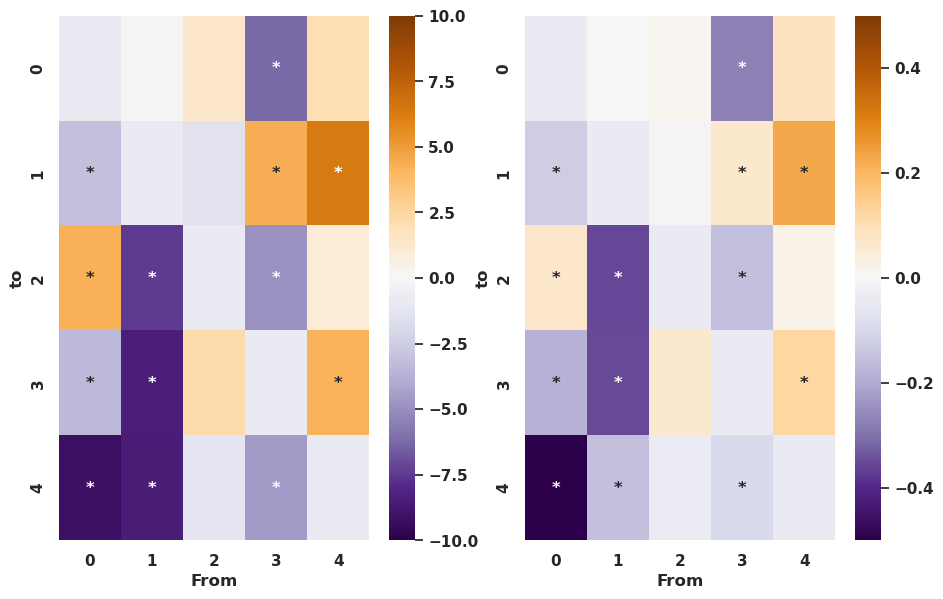


 Critical Z score is [[1.96]]



In [36]:
%matplotlib inline
plot_compare_condition_GC(F, cmap=cmap,
                       vmin = -10, vmax=10, Fmax=0.5)

## We compare TD and BU GC against on simulated perturbed VAR against the ground truth

In [40]:
cmap ='PuOr_r'
connect = 'pairwise'
band = '[0 125]'
# Useful paths
cifar_path = Path('~','projects','cifar').expanduser()
data_path = cifar_path.joinpath('data')
result_path = cifar_path.joinpath('results')
fname = "compare_ts_bu_simulated_GC_" + connect + '_' + band + "Hz.mat"
path = result_path
fpath = path.joinpath(fname)
# Read dataset
dataset = loadmat(fpath)
F = dataset['GC']
vmax = 5
vmin = -vmax

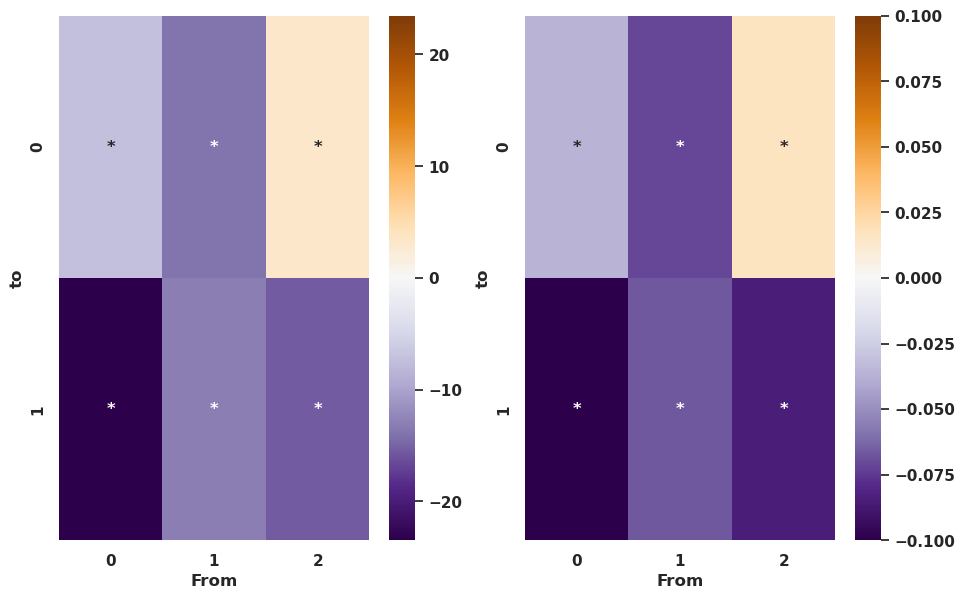

In [45]:
%matplotlib inline
plot_top_down_z(F, cmap=cmap,
                       vmin = -20, vmax=20, Fmax = 0.1)

## Sensitivity analysis

### Varying the number of channels

In [83]:
n = 5 # number of channels

In [86]:
m = 100 # observations
ntrial = 20 # trials
morder = 5 # morder
F = load_data(n=n,m=m,ntrial=ntrial)
# Read dataset
dataset = loadmat(fpath)
F = dataset['GC']
vmax = 5
vmin = -vmax

['compare', 'condition', 'simulated', 'GC', '5x100x20', 'pairwise', '5', '[0 125]', 'Hz.mat']
compare_condition_simulated_GC_5x100x20_pairwise_5_[0 125]_Hz.mat


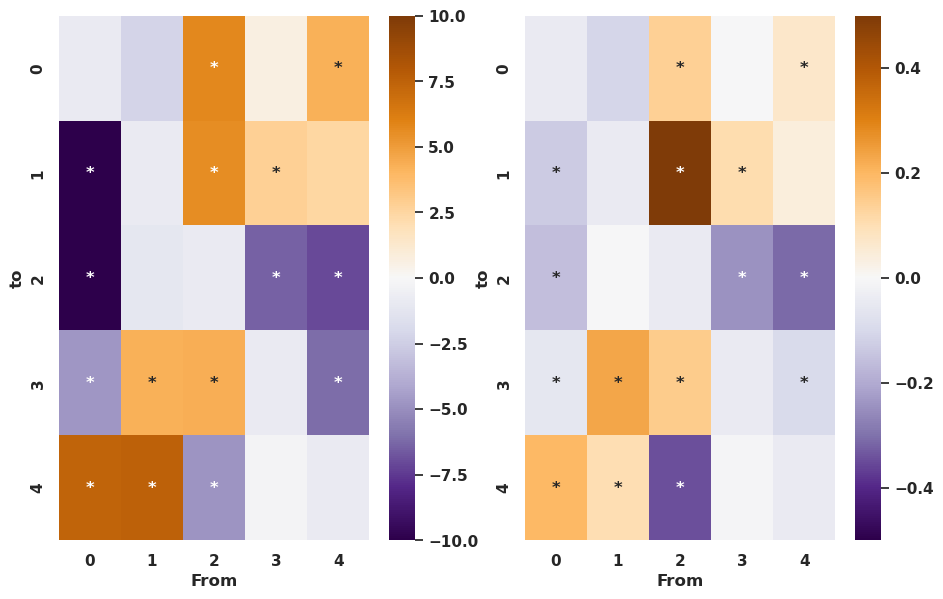


 Critical Z score is [[1.96]]



In [87]:
%matplotlib inline
plot_compare_condition_GC(F, cmap=cmap,
                       vmin = -10, vmax=10, Fmax=0.5)

### Varying number of observations (trials and observations per trials)
Observation: Break down when mobs is 60 (non positive-definite matrix) and N=1 (much lower number of obs than experimental conditions)



In [101]:
ntrial = 1
m = 70

In [102]:
morder = 5 # morder
F = load_data(n=n,m=m,ntrial=ntrial)
# Read dataset
dataset = loadmat(fpath)
F = dataset['GC']
vmax = 5
vmin = -vmax

['compare', 'condition', 'simulated', 'GC', '5x70x1', 'pairwise', '5', '[0 125]', 'Hz.mat']
compare_condition_simulated_GC_5x70x1_pairwise_5_[0 125]_Hz.mat


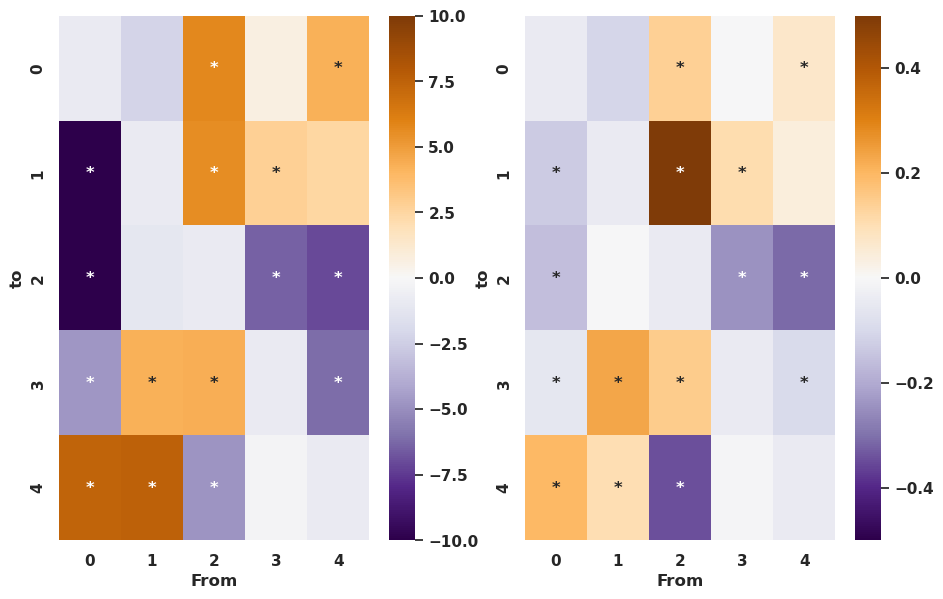


 Critical Z score is [[1.96]]



In [103]:
%matplotlib inline
plot_compare_condition_GC(F, cmap=cmap,
                       vmin = -10, vmax=10, Fmax=0.5)

## Vary number of permutations

In [114]:
nperm = 30

In [115]:
morder = 5 # morder
ntrial = 20
m = 30
n = 5
F = load_data(n=n,m=m,ntrial=ntrial,nperm=nperm)
# Read dataset
dataset = loadmat(fpath)
F = dataset['GC']
vmax = 5
vmin = -vmax

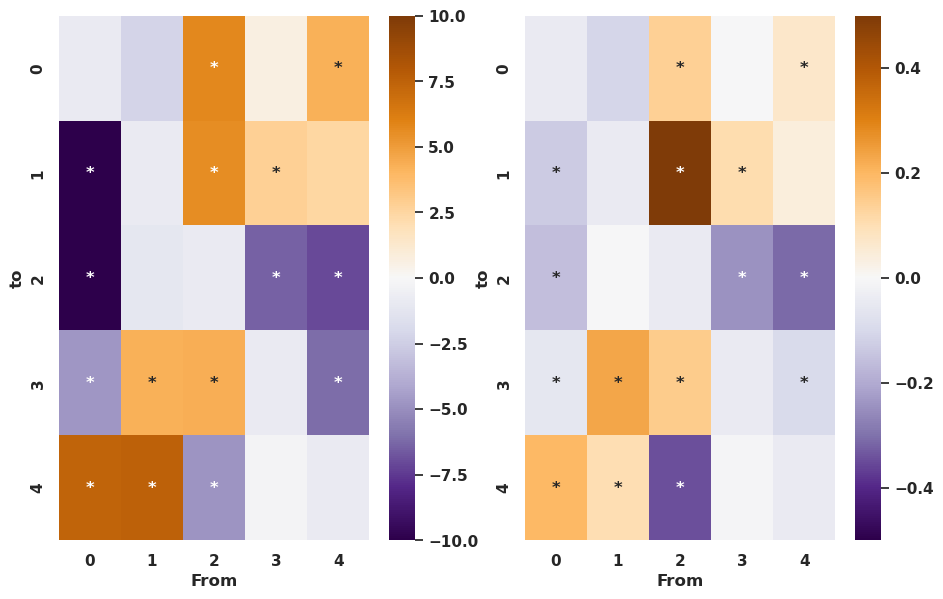


 Critical Z score is [[1.96]]



In [116]:
%matplotlib inline
plot_compare_condition_GC(F, cmap=cmap,
                       vmin = -10, vmax=10, Fmax=0.5)